In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os

base_dir = "/content/drive/MyDrive/Projets/FDD"
os.chdir(base_dir)
print("Répertoire courant :", os.getcwd())

Répertoire courant : /content/drive/MyDrive/Projets/FDD


In [5]:
import sqlite3
import pandas as pd

# Connexion à la base fusionnée
db_path = "bd/fusion_ieee.db"
conn = sqlite3.connect(db_path)

# Liste des tables
tables = pd.read_sql("SELECT name FROM sqlite_master WHERE type='table';", conn)
print("Tables disponibles :", tables['name'].tolist())

Tables disponibles : ['articles', 'sqlite_sequence', 'authors', 'labs', 'article_authors', 'author_labs', 'keywords']


# **Aperçu des tables principales**

In [10]:
# Nombre d’enregistrements par table
for table in tables['name']:
    count = pd.read_sql(f"SELECT COUNT(*) as total FROM {table}", conn)['total'][0]
    print(f"{table:<20} : {count}")

articles             : 10077
sqlite_sequence      : 4
authors              : 53493
labs                 : 19578
article_authors      : 0
author_labs          : 0
keywords             : 159043


# **Nombre d’articles par année**

<Axes: title={'center': "Nombre d'articles par année"}, xlabel='year'>

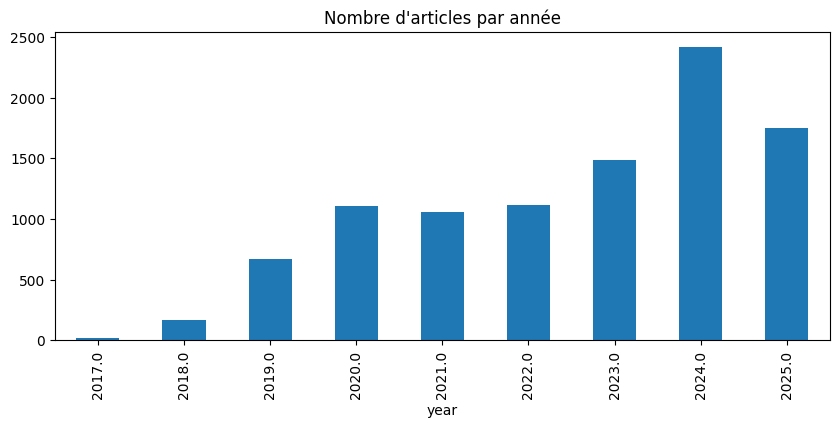

In [12]:
articles = pd.read_sql("SELECT * FROM articles", conn)
# Vérifier quelle colonne de date est présente
if 'date_of_publication' in articles.columns:
    date_col = 'date_of_publication'
elif 'date_publication' in articles.columns:
    date_col = 'date_publication'
else:
    raise KeyError("Aucune colonne de date trouvée dans la table 'articles'.")

# Conversion et extraction de l'année
articles[date_col] = pd.to_datetime(articles[date_col], errors='coerce')
articles['year'] = articles[date_col].dt.year

articles_per_year = articles['year'].value_counts().sort_index()
articles_per_year.plot(kind='bar', figsize=(10,4), title="Nombre d'articles par année")

articles_per_year = articles['year'].value_counts().sort_index()
articles_per_year.plot(kind='bar', figsize=(10,4), title="Nombre d'articles par année")

# **Top 20 mots-clés**

<Axes: title={'center': 'Top 20 mots-clés'}, ylabel='keyword'>

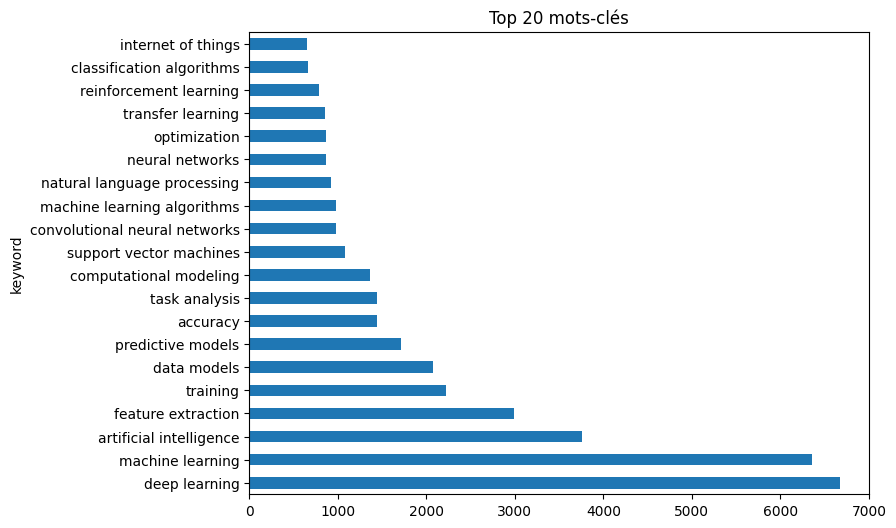

In [13]:
keywords = pd.read_sql("SELECT * FROM keywords", conn)
top_keywords = keywords['keyword'].value_counts().head(20)
top_keywords.plot(kind='barh', figsize=(8,6), title="Top 20 mots-clés")

# **Top auteurs**

<Axes: title={'center': 'Top 20 auteurs'}, ylabel='name'>

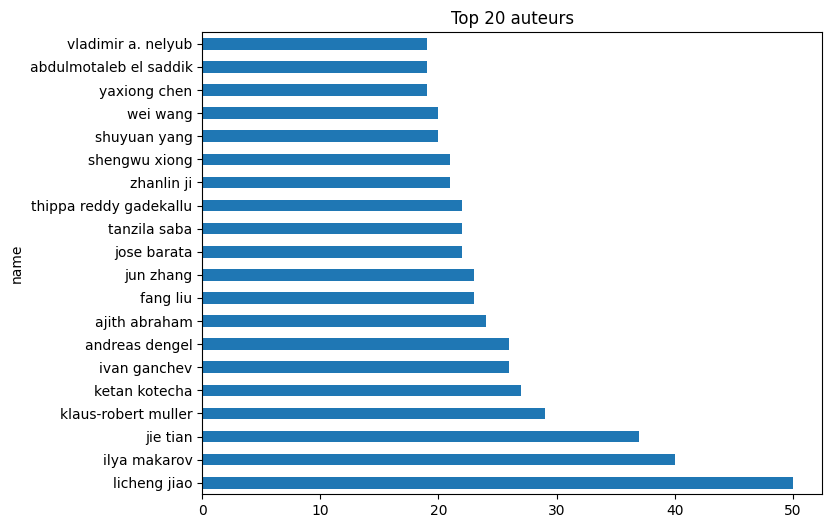

In [14]:
authors = pd.read_sql("SELECT * FROM authors", conn)
top_authors = authors['name'].value_counts().head(20)
top_authors.plot(kind='barh', figsize=(8,6), title="Top 20 auteurs")

In [15]:
import matplotlib.pyplot as plt
plt.savefig("analyse/graph_articles_par_annee.png")

<Figure size 640x480 with 0 Axes>